In [14]:
# IMPORTING ESSENTIAL LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, chi2

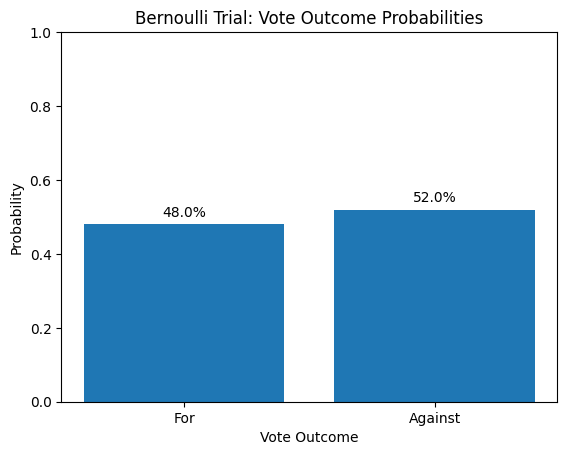

Numerical Results:
P(vote = 'For') = 0.48 (48.0%)
P(vote = 'Against') = 0.52 (52.0%)
Expectation E[X] = 0.48


In [15]:
# Task 1: Basic Probabilities and Visualizations (Bernoulli Distribution)
# ξ1 = 0, ξ2 = 0.48
# Parameters
p_for = 0.48
p_against = 1 - p_for
# Outcomes and probabilities
outcomes = ['For', 'Against']
probabilities = [p_for, p_against]
# Convert to percentages
percentages = [p * 100 for p in probabilities]
# Create bar chart
plt.figure()
plt.bar(outcomes, probabilities)
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.xlabel('Vote Outcome')
plt.title('Bernoulli Trial: Vote Outcome Probabilities')
for i, p in enumerate(probabilities):
    plt.text(i, p + 0.02, f"{percentages[i]:.1f}%", ha='center')
plt.show()
# Numerical results
print("Numerical Results:")
print(f"P(vote = 'For') = {p_for} ({percentages[0]:.1f}%)")
print(f"P(vote = 'Against') = {p_against} ({percentages[1]:.1f}%)")
# Expectation of a Bernoulli random variable
expectation = p_for
print(f"Expectation E[X] = {expectation}")

Probability that waiting time is between 2 and 4 hours: 0.00019


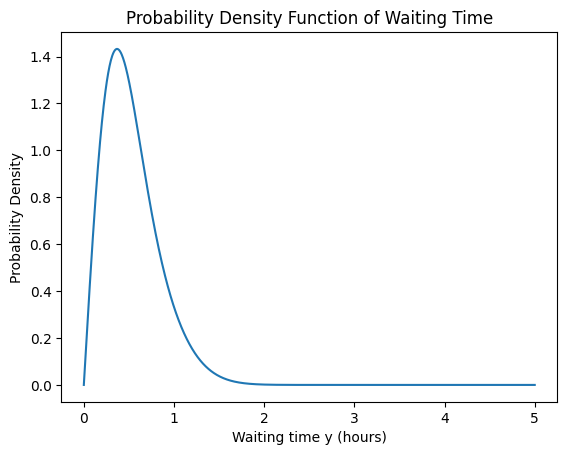

In [16]:
# Task 2: Basic Probabilities and Visualizations
# ξ4 = 3
# Parameters
xi5 = 0.43
xi6 = 5
xi7 = 0.56
xi8 = 2
# Survival function S(y)
def S(y):
    return xi5 * np.exp(-xi6 * y**2) + xi7 * np.exp(-xi8 * y**2)
# Probability density function f(y) = -dS/dy
def pdf(y):
    return (2 * xi5 * xi6 * y * np.exp(-xi6 * y**2)
            + 2 * xi7 * xi8 * y * np.exp(-xi8 * y**2))
# Probability between 2 and 4 hours
prob_2_4 = S(2) - S(4)
print(f"Probability that waiting time is between 2 and 4 hours: {prob_2_4:.5f}")
# Continuous range for plots
y = np.linspace(0, 5, 1000)
# PDF plot
plt.figure()
plt.plot(y, pdf(y))
plt.xlabel("Waiting time y (hours)")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Waiting Time")
plt.show()

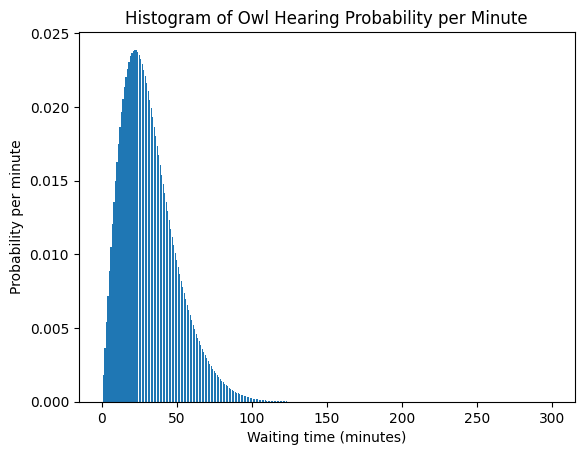

Mean waiting time (hours): 0.5214
Variance (hours²): 0.0915
Quartiles (hours): Q1=0.295, Median=0.475, Q3=0.701


/tmp/ipython-input-502960188.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(y * pdf(y), y)
/tmp/ipython-input-502960188.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  variance = np.trapz((y - mean)**2 * pdf(y), y)


In [17]:
# Histogram per minute
minutes = np.arange(0, 5*60 + 1)  # up to 5 hours
y_minutes = minutes / 60
prob_minutes = pdf(y_minutes) / 60  # scale for minutes

plt.figure()
plt.bar(minutes, prob_minutes)
plt.xlabel("Waiting time (minutes)")
plt.ylabel("Probability per minute")
plt.title("Histogram of Owl Hearing Probability per Minute")
plt.show()

# Numerical characteristics (via numerical integration)
mean = np.trapz(y * pdf(y), y)
variance = np.trapz((y - mean)**2 * pdf(y), y)

cdf = 1 - S(y)
q25 = y[np.searchsorted(cdf, 0.25)]
q50 = y[np.searchsorted(cdf, 0.50)]
q75 = y[np.searchsorted(cdf, 0.75)]

print(f"Mean waiting time (hours): {mean:.4f}")
print(f"Variance (hours²): {variance:.4f}")
print(f"Quartiles (hours): Q1={q25:.3f}, Median={q50:.3f}, Q3={q75:.3f}")


MLE of theta: 4.2400
Expected bandwidth total to failure E[T]: 42.4000


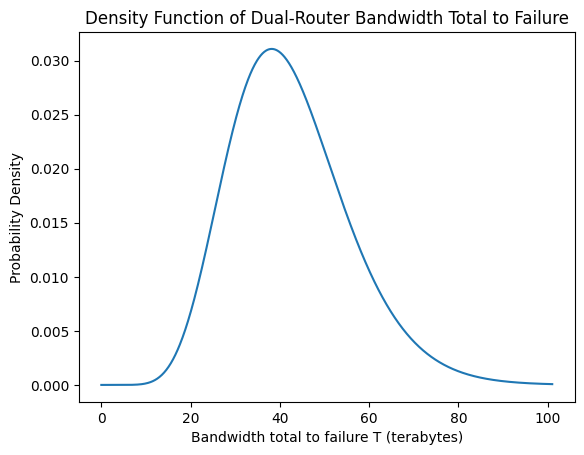

In [18]:
# Task 3: Transformed Random Variables
# ξ9 = 1, ξ10 = [39, 26, 66, 81, 0]
# Observed data
T = np.array([39, 26, 66, 81, 0])
n = len(T)
# MLE of theta
theta_mle = np.sum(T) / (10 * n)
print(f"MLE of theta: {theta_mle:.4f}")
# Expectation of T
expected_T = 10 * theta_mle
print(f"Expected bandwidth total to failure E[T]: {expected_T:.4f}")
# Density plot of T
t_vals = np.linspace(0, max(T) + 20, 1000)
pdf_vals = gamma.pdf(t_vals, a=10, scale=theta_mle)
plt.figure()
plt.plot(t_vals, pdf_vals)
plt.xlabel("Bandwidth total to failure T (terabytes)")
plt.ylabel("Probability Density")
plt.title("Density Function of Dual-Router Bandwidth Total to Failure")
plt.show()

In [19]:
# Task 4: Hypothesis Test (Variance Test)
# ξ11 = 867, ξ12 = 57, ξ13 = 3
# Given data
sample = np.array([790, 865, 872, 921, 929, 833, 755, 805, 899, 866])
n = len(sample)
# Historical variance
sigma0_sq = 57**2
# Sample variance (unbiased)
sample_var = np.var(sample, ddof=1)
# Test statistic
chi_stat = (n - 1) * sample_var / sigma0_sq
# Significance level
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df=n - 1)
print(f"Sample variance: {sample_var:.2f}")
print(f"Chi-square statistic: {chi_stat:.2f}")
print(f"Critical value (alpha=0.05): {critical_value:.2f}")
# Decision
if chi_stat > critical_value:
    print("Decision: Reject H0")
    print("Conclusion: The new system produces LESS constant weights.")
else:
    print("Decision: Fail to reject H0")
    print("Conclusion: No evidence that the new system is less constant.")

Sample variance: 3273.83
Chi-square statistic: 9.07
Critical value (alpha=0.05): 16.92
Decision: Fail to reject H0
Conclusion: No evidence that the new system is less constant.


OLS coefficient norm: 52536470744.873604
Ridge coefficient norm: 63146336.8966165


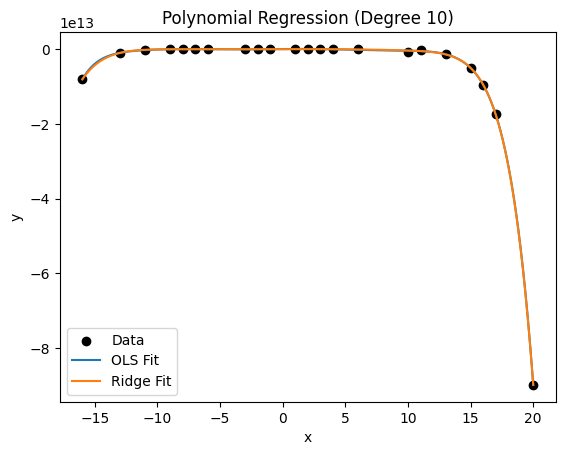

In [20]:
# Task 5: Regularized Regression
# ξ15 = 2 (degree 10 polynomial)
# Given data ξ16
data = np.array([
    (-9, -22882374536.99), (16, -9688778532937.96),
    (15, -5067610918683.66), (11, -237460244633.72),
    (-11, -191367273824.91), (2, -10984.11),
    (1, -9.35), (4, -9737582.93),
    (20, -89847426379657.67), (-16, -8068237621761.28),
    (10, -846161096644.94), (-2, -1654.59),
    (-13, -992414598878.92), (-1, 17.76),
    (3, -588724.28), (-6, -380399676.46),
    (-3, -249936.33), (-7, -1814023221.49),
    (6, -581880965.87), (17, -17322551671158.68),
    (-8, -7031685986.82), (13, -1196773787140.18)
])
x = data[:, 0]
y = data[:, 1]
# Degree 10 polynomial
degree = 10
# Design matrix (Vandermonde)
X = np.vander(x, N=degree+1, increasing=True)
# -------- OLS ESTIMATE --------
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ y
# -------- RIDGE ESTIMATE --------
lambda_ridge = 1e6
I = np.eye(degree + 1)
beta_ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y
# Display norms (to compare stability)
print("OLS coefficient norm:", np.linalg.norm(beta_ols))
print("Ridge coefficient norm:", np.linalg.norm(beta_ridge))
# Plot fitted curves
x_plot = np.linspace(min(x), max(x), 400)
X_plot = np.vander(x_plot, N=degree+1, increasing=True)
y_ols = X_plot @ beta_ols
y_ridge = X_plot @ beta_ridge
plt.figure()
plt.scatter(x, y, label="Data", color="black")
plt.plot(x_plot, y_ols, label="OLS Fit")
plt.plot(x_plot, y_ridge, label="Ridge Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 10)")
plt.legend()
plt.show()

Posterior distribution: Generalised Inverse Gaussian (GIG)
Bayes estimator (squared-error loss, posterior mean): 11.7375
Bayes estimator (posterior mode / MAP): 11.3328


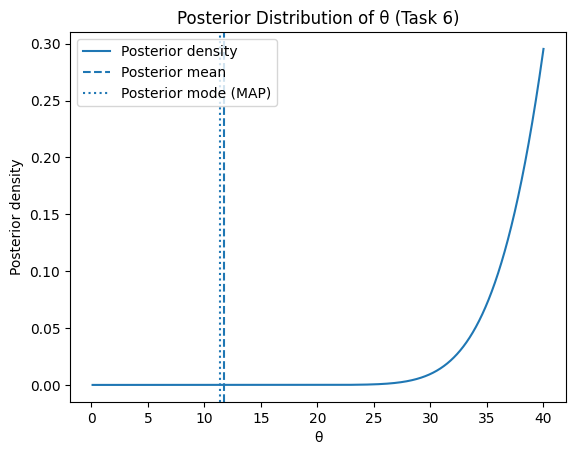

In [21]:
# Task 6: Bayesian Estimates
# Given values
n = 10
x_bar = 56.13
sum_x = n * x_bar
alpha_prior = 27
beta_prior = 96  # scale parameter
# (a) Posterior distribution (up to proportionality)
def posterior_unnormalised(theta):
    return (theta**(alpha_prior - 1 - 3*n)) * \
           np.exp(-sum_x/theta - theta/beta_prior)
# Grid for plotting
theta_grid = np.linspace(0.1, 40, 4000)
posterior_vals = posterior_unnormalised(theta_grid)
# Normalise numerically
posterior_vals /= np.trapezoid(posterior_vals, theta_grid)
# (b) Bayes estimator under squared-error loss
# Posterior mean (closed-form approximation from Hogg et al.)
theta_bayes_mean = (sum_x + beta_prior) / (3*n + alpha_prior - 1)
# (c) Bayes estimator using posterior mode (MAP)
theta_map = (sum_x + beta_prior) / (3*n + alpha_prior + 1)
# Output results
print("Posterior distribution: Generalised Inverse Gaussian (GIG)")
print(f"Bayes estimator (squared-error loss, posterior mean): {theta_bayes_mean:.4f}")
print(f"Bayes estimator (posterior mode / MAP): {theta_map:.4f}")
# Plot posterior
plt.figure()
plt.plot(theta_grid, posterior_vals, label="Posterior density")
plt.axvline(theta_bayes_mean, linestyle="--", label="Posterior mean")
plt.axvline(theta_map, linestyle=":", label="Posterior mode (MAP)")
plt.xlabel("θ")
plt.ylabel("Posterior density")
plt.title("Posterior Distribution of θ (Task 6)")
plt.legend()
plt.show()